In [2]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import bisect
import matplotlib.pyplot as plt

In [3]:
# Parâmetros do sistema de Duffing
delta = 0.1
alpha = 0.0
beta = 1.0
gamma = 5.6
omega = 1.0

# Sistema de Duffing (F(s, t))
def F(s, t):
    x, y = s
    dxdt = y
    dydt = -delta * y - alpha * x - beta * (x**3) + gamma * np.sin(omega * t)
    return [dxdt, dydt]

# Jacobiana do sistema de Duffing (parte autônoma, desprezando forçamento senoidal)
def DF(s):
    x, y = s
    return np.array([
        [0, 1],
        [-alpha - 3 * beta * (x**2), -delta]
    ])

In [4]:
# Jacobiana do acoplamento
def DH(s):
    return np.array([
        [0, 0],
        [0, 1]
    ])

In [5]:
def MSF(r, t_span=(0, 10**3), dt=0.001):
    t = np.arange(t_span[0], t_span[1], dt)
    s0 = [1.0, 1.0]  # Condição inicial para o sistema de Duffing (x, y)
    s_t = odeint(F, s0, t)  # Solução do sistema não acoplado

    xi = np.random.rand(2)  # Vetor de perturbação inicial
    xi /= np.linalg.norm(xi)  # Normalização
    LE = 0.0  # Inicializa o expoente de Lyapunov

    for i in range(1, len(t)):
        J = DF(s_t[i]) - r * DH(s_t[i])  # Jacobiano variacional
        xi = np.dot(np.eye(2) + dt * J, xi)  # Evolução linear de xi
        xi_norm = np.linalg.norm(xi)
        LE += np.log(xi_norm)
        xi /= xi_norm  # Renormaliza

    return LE / (len(t) * dt)  # Retorna o expoente médio

In [6]:
# Intervalo de r = sigma * lambda_k
r_values = np.linspace(0, 50, 7*(10**2))
LE_values = [MSF(r) for r in r_values]

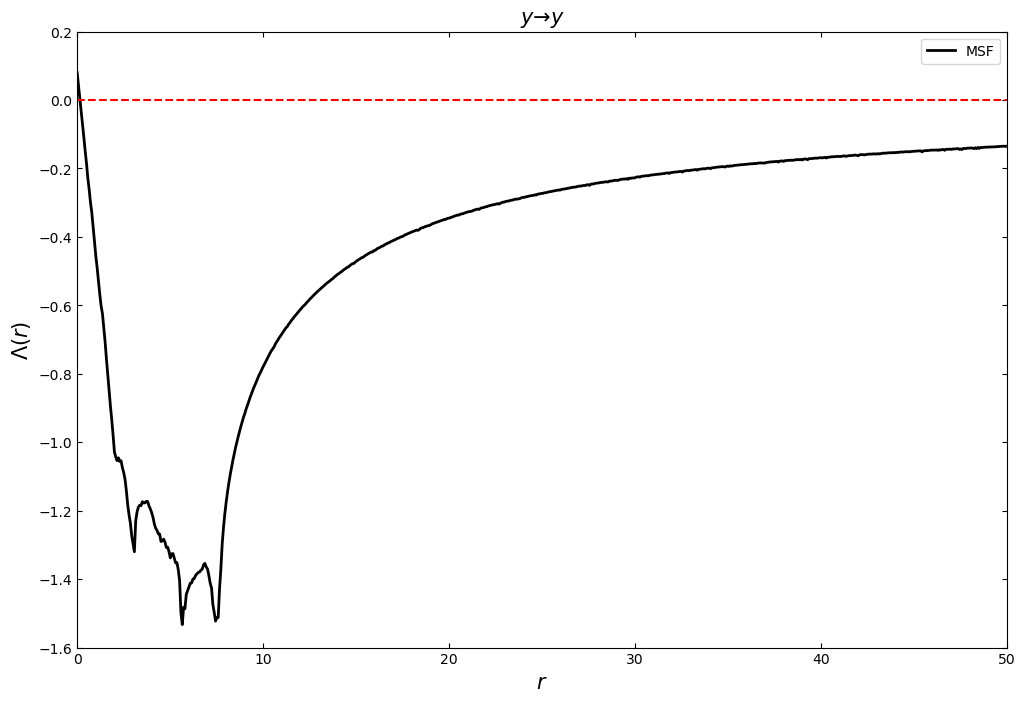

In [16]:
# Plotar MSF
plt.figure(figsize=(12, 8))
plt.plot(r_values, LE_values, 'k', linewidth=2, label='MSF')
plt.axhline(0, color='r', linestyle='--')
plt.xlim(0, 50)
plt.ylim(-1.6, 0.2)
plt.xlabel(r'$r$', fontsize=15)
plt.ylabel(r'$\Lambda(r)$', fontsize=15)
plt.title(r'$y \to y$', fontsize=15)
plt.legend()
plt.grid(False)
plt.tick_params(which='both', direction='in', top=True, right=True)
plt.show()

In [15]:
# Encontra os pontos onde MSF(r) = 0 usando bisect
r_1 = bisect(lambda r: MSF(r), 0.10, 1, rtol=1e-6)
print(f"r_1 = {r_1:.3f}")

r_1 = 0.156


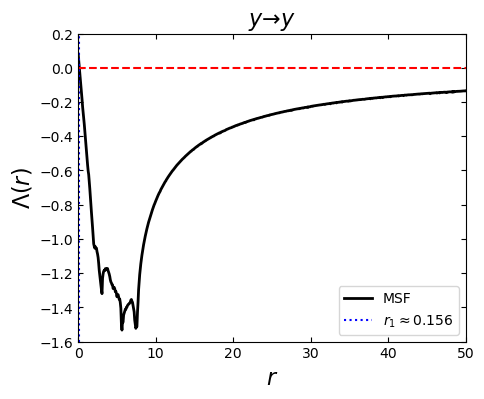

In [20]:
# Plotar MSF
fig22=plt.figure(figsize=(5, 4))
plt.plot(r_values, LE_values, 'k', linewidth=2, label='MSF')
plt.axhline(0, color='r', linestyle='--')
plt.axvline(r_1, color='b', linestyle=':', label=fr'$r_1 \approx {r_1:.3f}$')
plt.xlim(0, 50)
plt.ylim(-1.6, 0.2)
plt.xlabel(r'$r$', fontsize=16)
plt.ylabel(r'$\Lambda(r)$', fontsize=16)
plt.title(r'$y \to y$', fontsize=16)
plt.legend()
plt.grid(False)
plt.tick_params(which='both', direction='in', top=True, right=True)
fig22.savefig('yy.pdf', format='pdf', dpi=300)
plt.show()